In [ ]:
!curl 'https://drive.switch.ch/index.php/s/36z3AosY9PxXmPz/download' \
  -H 'Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7' \
  -H 'Accept-Language: de-DE,de;q=0.9,en-DE;q=0.8,en;q=0.7,en-US;q=0.6,fr;q=0.5' \
  -H 'Connection: keep-alive' \
  -H 'Cookie: _saml_sp=aHR0cHM6Ly9tZWRpYXNwYWNlLmVwZmwuY2g%3D; _saml_idp=aHR0cHM6Ly9pZHAuZXBmbC5jaC9pZHAvc2hpYmJvbGV0aA%3D%3D; oc_sessionPassphrase=oQOtw1WsT%2FsMDkPH2YyJMH4XEwjX9pxVSDdWI8a14ITqpk99srMX784HJXoGItbqGt%2BJKBa80klyHMeGMtUKcTSOrktiyCIziSlUCjwLmPLiDPczEw1R%2Bc8VDmWFCHHP; oc641cdd42e0=s50kdls2itap4e3qrscu1s2fij' \
  -H 'Referer: https://drive.switch.ch/index.php/s/36z3AosY9PxXmPz' \
  -H 'Sec-Fetch-Dest: document' \
  -H 'Sec-Fetch-Mode: navigate' \
  -H 'Sec-Fetch-Site: same-origin' \
  -H 'Sec-Fetch-User: ?1' \
  -H 'Upgrade-Insecure-Requests: 1' \
  -H 'User-Agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/127.0.0.0 Safari/537.36' \
  -H 'sec-ch-ua: "Not)A;Brand";v="99", "Google Chrome";v="127", "Chromium";v="127"' \
  -H 'sec-ch-ua-mobile: ?0' \
  -H 'sec-ch-ua-platform: "Linux"' \
  -o dataset-large.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  7 33.9G    7 2503M    0     0  22.8M      0  0:25:22  0:01:49  0:23:33 23.4M^C


In [ ]:
!curl 'https://drive.switch.ch/index.php/s/9gZnG5r0F25czXR/download' \
  -H 'Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7' \
  -H 'Accept-Language: de-DE,de;q=0.9,en-DE;q=0.8,en;q=0.7,en-US;q=0.6,fr;q=0.5' \
  -H 'Connection: keep-alive' \
  -H 'Cookie: _saml_sp=aHR0cHM6Ly9tZWRpYXNwYWNlLmVwZmwuY2g%3D; _saml_idp=aHR0cHM6Ly9pZHAuZXBmbC5jaC9pZHAvc2hpYmJvbGV0aA%3D%3D; oc_sessionPassphrase=IjDp5nd4QNWA1VGIPqmEC97sBD7BhL3Vd9yj2rF1yJL6TE%2Fj7toTM39nVvjGvLuEJCjFaBcPXiZcW8%2BjAGtSs8fLDbjXq3hTHMcZBBOkS21GSQuhMEJqhboNR6I3xyUL; oc641cdd42e0=ic2f1q87j5einl3kb6uith47qn' \
  -H 'Referer: https://drive.switch.ch/index.php/s/9gZnG5r0F25czXR' \
  -H 'Sec-Fetch-Dest: document' \
  -H 'Sec-Fetch-Mode: navigate' \
  -H 'Sec-Fetch-Site: same-origin' \
  -H 'Sec-Fetch-User: ?1' \
  -H 'Upgrade-Insecure-Requests: 1' \
  -H 'User-Agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/127.0.0.0 Safari/537.36' \
  -H 'sec-ch-ua: "Not)A;Brand";v="99", "Google Chrome";v="127", "Chromium";v="127"' \
  -H 'sec-ch-ua-mobile: ?0' \
  -H 'sec-ch-ua-platform: "Linux"' \
  -o dataset.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2150M  100 2150M    0     0  22.1M      0  0:01:37  0:01:37 --:--:-- 21.9M


In [ ]:
!mkdir -p ./dataset
!rm -r ./dataset
!mkdir -p ./dataset
!tar -xzvf dataset.tar.gz -C dataset
!pip install transformers


In [ ]:
from joblib import Parallel, delayed
from tqdm import tqdm
from concurrent.futures import ThreadPoolExecutor
import os
import moviepy.editor as mp
import pandas as pd
from transformers import pipeline
import pandas as pd

In [3]:
# Define the input and output directories
input_dir = "./dataset/justval"
output_dir = "./dataset/justval-wav"

def process_row(mp4_file,label):
    mp4_path = os.path.join(input_dir, mp4_file)
    filename = os.path.splitext(mp4_file)[0]
    wav_filepath = mp4_file.replace('.mp4', '.wav')
    wav_path = os.path.join(output_dir, wav_filepath)

    try:
        video = mp.VideoFileClip(mp4_path)
        audio = video.audio
        os.makedirs(os.path.dirname(wav_path), exist_ok=True)
        # turn off logging from the conversion
        audio.write_audiofile(wav_path, logger=None)
        video.close()
        audio.close()
        return [wav_filepath, label]
    except Exception as e:
        print(f"Error processing {mp4_path}: {e}")
        return None

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Get a list of all mp4 files from the val-filelist
dataset = pd.read_csv(input_dir+'/val-filelist.csv')
results = Parallel(n_jobs=-1)(delayed(process_row)(row['filepath'], row['label']) for index, row in dataset.iterrows())

new_dataset = pd.DataFrame([result for result in results if result is not None], columns=['filepath', 'label'])
with open(output_dir+"/val-filelist.csv", "w") as f:
    new_dataset.to_csv(f, index=False)


In [13]:
fake_prediction_model = pipeline("audio-classification", model="alexandreacff/wav2vec2-base-ft-fake-detection")

In [40]:
n = 50
new_dataset = pd.read_csv('./dataset/justval-wav/val-filelist.csv')
fakes = new_dataset[new_dataset['label'] == 'fake'].head(n)
reals = new_dataset[new_dataset['label'] == 'real'].head(n)

#combine
to_predict = pd.concat([fakes, reals])


to_predict



,filepath,label
0,val/fake/00051/4_00051_f_01_01_p_2-model_160d-...,fake
1,val/fake/00051/4_00051_f_01_01_p_2-model_160d-...,fake
2,val/fake/00051/4_00051_f_01_01_p_2-model_160d-...,fake
3,val/fake/00051/4_00051_f_01_01_p_2-model_160d-...,fake
4,val/fake/00051/4_00051_f_01_01_p_2-model_160d-...,fake
...,...,...
1451,val/real/00054/4_00054_f_01_06_t_2.wav,real
1452,val/real/00054/4_00054_f_01_07_p_2.wav,real
1453,val/real/00054/4_00054_f_01_07_t_2.wav,real
1454,val/real/00054/4_00054_f_01_08_p_2.wav,real


In [41]:

def predict_fake(wav):
  model_result = fake_prediction_model(wav)
  prediction = model_result[0]['label']
  return model_result[0]['label'], model_result[0]['score']




results = []
# Iterate over the first 5 entries in the dataset
for index, row in tqdm(to_predict.iterrows()):
  filepath = '/content/dataset/justval-wav/' + row['filepath']
  label = row['label']
  # Extract the prediction from the model result
  prediction,cetainty = predict_fake(filepath)
  # Append the results to the list
  results.append([filepath, label, prediction,cetainty])

# Create a new DataFrame from the results
fake_predictions = pd.DataFrame(results, columns=['filepath', 'label', 'model_result','cetainty'])


98it [05:15,  3.22s/it]


In [43]:
def calc_false_negative(df, truth_col, prediction_col):
    false_negatives = df[(df[truth_col] == 'fake') & (df[prediction_col] == 'real')].shape[0]
    total_fake = df[df[truth_col] == 'fake'].shape[0]
    false_negative_fraction = false_negatives / total_fake
    return false_negatives,total_fake,false_negative_fraction

def calc_false_positive(df, truth_col, prediction_col):
    false_positives = df[(df[truth_col] == 'real') & (df[prediction_col] == 'fake')].shape[0]
    total_real = df[df[truth_col] == 'real'].shape[0]
    false_positive_fraction = false_positives / total_real
    return false_positives,total_real,false_positive_fraction

def report_false_positives(df, truth_col, prediction_col):
    false_negatives,total_fake,false_negative_fraction = calc_false_negative(df, truth_col, prediction_col)
    false_positives,total_real,false_positive_fraction = calc_false_positive(df, truth_col, prediction_col)

    print(f"{false_negatives}/{total_fake} ({false_negative_fraction:.2%}) false negatives")
    print(f"{false_positives}/{total_real} ({false_positive_fraction:.2%}) false positives")

report_false_positives(fake_predictions, 'label', 'model_result')
fake_predictions

0/50 (0.00%) false negatives
48/48 (100.00%) false positives


,filepath,label,model_result,cetainty
0,/content/dataset/justval-wav/val/fake/00051/4_...,fake,fake,0.630744
1,/content/dataset/justval-wav/val/fake/00051/4_...,fake,fake,0.630744
2,/content/dataset/justval-wav/val/fake/00051/4_...,fake,fake,0.630744
3,/content/dataset/justval-wav/val/fake/00051/4_...,fake,fake,0.630744
4,/content/dataset/justval-wav/val/fake/00051/4_...,fake,fake,0.630744
...,...,...,...,...
93,/content/dataset/justval-wav/val/real/00054/4_...,real,fake,0.527706
94,/content/dataset/justval-wav/val/real/00054/4_...,real,fake,0.553404
95,/content/dataset/justval-wav/val/real/00054/4_...,real,fake,0.513331
96,/content/dataset/justval-wav/val/real/00054/4_...,real,fake,0.527011


In [33]:
# prompt: perform binary search between 0..1 to figure out which threshold has the minimum amount of false-positives and false negatives.
# add a new collumn to the dataframe given that prediction named  'threshold_prediction' and then report the false positives and false_negativess using the report_false_positives(fake_predictions, 'label', 'threshold_prediction')

import numpy as np

def find_optimal_threshold(df, truth_col, prediction_col, certainty_col, lower_bound=0, upper_bound=1, step=0.01):
  """
  Performs a binary search to find the optimal threshold for a classification model.

  Args:
    df: Pandas DataFrame containing the predictions.
    truth_col: Name of the column containing the true labels.
    prediction_col: Name of the column containing the model's predictions.
    certainty_col: Name of the column containing the model's confidence scores.
    lower_bound: Lower bound for the threshold search.
    upper_bound: Upper bound for the threshold search.
    step: Step size for the binary search.

  Returns:
    The optimal threshold value.
  """
  best_threshold = 0
  min_error = float('inf')

  for threshold in np.arange(lower_bound, upper_bound + step, step):
    df['threshold_prediction'] = np.where(df[certainty_col] >= threshold, df[prediction_col], 'real')
    false_negatives, _, false_negative_fraction = calc_false_negative(df, truth_col, 'threshold_prediction')
    false_positives, _, false_positive_fraction = calc_false_positive(df, truth_col, 'threshold_prediction')
    total_error = false_negative_fraction + false_positive_fraction

    if total_error < min_error:
      min_error = total_error
      best_threshold = threshold

  return best_threshold


# Find the optimal threshold
optimal_threshold = find_optimal_threshold(fake_predictions, 'label', 'model_result', 'cetainty')

print("Optimal threshold:", optimal_threshold)


Optimal threshold: 0.63


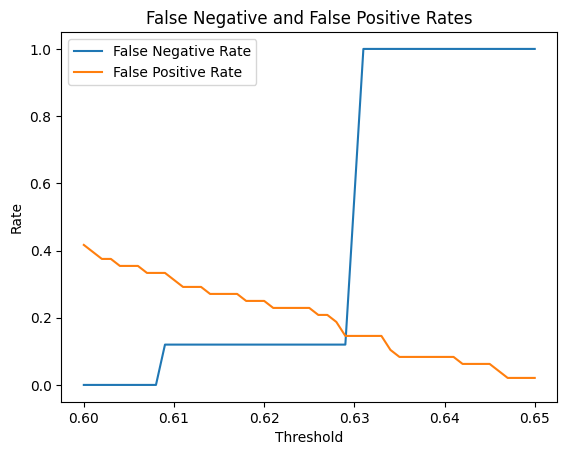

In [44]:
# prompt: plot the false negative and false positive rate in relation to the optimal threshold between 0.6 and 0.65 with 0.001 steps

import matplotlib.pyplot as plt

# Initialize lists to store the false negative and false positive rates
false_negative_rates = []
false_positive_rates = []
thresholds = []

# Iterate over the threshold values
for threshold in np.arange(0.6, 0.65, 0.001):
  # Apply the threshold to the predictions
  fake_predictions['threshold_prediction'] = np.where(fake_predictions['cetainty'] >= threshold, fake_predictions['model_result'], 'real')

  # Calculate the false negative and false positive rates
  false_negatives, total_fake, false_negative_fraction = calc_false_negative(fake_predictions, 'label', 'threshold_prediction')
  false_positives, total_real, false_positive_fraction = calc_false_positive(fake_predictions, 'label', 'threshold_prediction')

  # Append the rates and threshold to the lists
  false_negative_rates.append(false_negative_fraction)
  false_positive_rates.append(false_positive_fraction)
  thresholds.append(threshold)

# Plot the false negative and false positive rates
plt.plot(thresholds, false_negative_rates, label='False Negative Rate')
plt.plot(thresholds, false_positive_rates, label='False Positive Rate')
plt.xlabel('Threshold')
plt.ylabel('Rate')
plt.title('False Negative and False Positive Rates')
plt.legend()
plt.show()


In [45]:
#set threshold manually
optimal_threshold = 0.629

# Apply the threshold to the predictions
fake_predictions['threshold_prediction'] = np.where(fake_predictions['cetainty'] >= optimal_threshold, fake_predictions['model_result'], 'real')

# Report the false positives and false negatives
report_false_positives(fake_predictions, 'label', 'threshold_prediction')


6/50 (12.00%) false negatives
7/48 (14.58%) false positives
